# Contents
1. <a href="#Spatial-Resolution:-Sub-and-Over-Sampling">Spatial Resolution</a>
2. <a href="#Log-Intensity-Transformation">Log-Intensity Transformation</a>
3. <a href="#Power-Law-(Gamma)-Transformation">Power Law (Gamma) Transformation</a>
4. <a href="#Contrast-Stretching">Contrast Stretching</a>

# Spatial Resolution: Sub and Over-Sampling

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

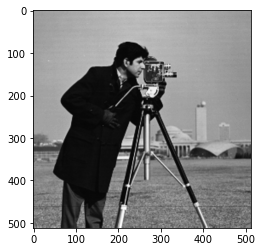

In [56]:
img=data.camera()
h,w=img.shape
plt.imshow(img, 'gray')
Image.fromarray(img).save('camera('+str(h)+'x'+str(w)+').jpg')
# You can checkout the image created

# Sub-Sampling
Means resizing to smaller size image

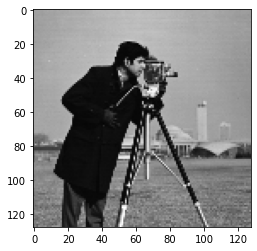

In [52]:
height, width=img.shape
th=4
height=int(height/th)
width=int(width/th)
imgNew=np.ndarray((height, width), dtype=np.uint8)
for i in range(0,height):
    for j in range(0,width):
        imgNew[i][j]=img[i*th][j*th]
plt.imshow(imgNew, 'gray')
Image.fromarray(imgNew).save('camera_sub-sampled('+str(width)+'x'+str(height)+').jpg')
# You can checkout the image created

# Over-Sampling:
Resizing image to larger size

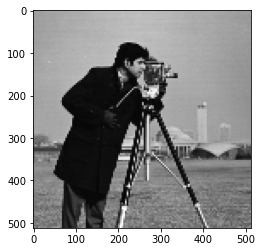

In [53]:
h,w=imgNew.shape
old_h=h
old_w=w
th=4
h=h*th
w=w*th
imgNew2=np.ndarray((h,w),dtype=np.uint8)
for i in range(0,h):
    for j in range(0,w):
        imgNew2[i][j]=imgNew[int(i/th)][int(j/th)]
plt.imshow(imgNew2, 'gray')
imfile=Image.fromarray(imgNew2)
imfile.save('camera_over-sampled from ('+str(old_w)+'x'+str(old_h)+') to ('+str(h)+'x'+str(w)+').jpg')
# You can checkout the image created

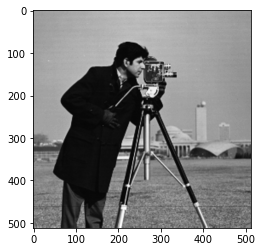

In [23]:
img=data.camera()
plt.imshow(img, 'gray')

## Log Intensity Transformation

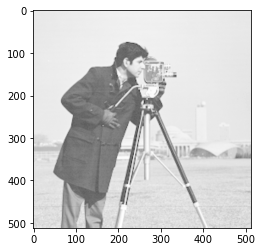

In [25]:
c = 255/(np.log(1 + np.max(img)))
img=data.camera()
height, width=img.shape
for i in range(0,height):
    for j in range(0,width):
        img[i][j]=c*np.log(1+img[i][j])
plt.imshow(img, 'gray')
Image.fromarray(img).save('LogTransformed.jpg')
# You can checkout the image created

## Power-Law (Gamma) Transformation

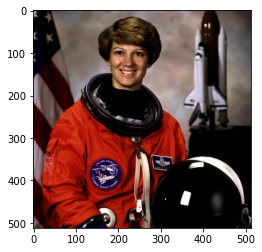

In [57]:
gamma=2.5
img=data.astronaut()
img=np.array(255*(img/255)**gamma, dtype='uint8')
plt.imshow(img)
Image.fromarray(data.astronaut()).save('GammaCorrected_Before.jpg')
# You can checkout the image created
Image.fromarray(img).save('GammaCorrected_After.jpg')
# You can checkout the image created

# Contrast Stretching

In [110]:
def contrast_stretch(r1,s1,r2,s2, px):
    if px>=0 and px<r1:
        return (s1/r1)*px
    elif px>=r1 and px<r2:
        return ((s2-s1)/(r2-r1)*px-r1)+s1
    else:
        return ((255-s2)/(255-r2))*(px-r2)+s2

In [ ]:
img=data.camera()
original=img.copy()

In [ ]:
r1,s1=(0,70)
r2,s2=(180,255)
contrast_vc=np.vectorize(contrast_stretch)
img=contrast_vc(r1,s1,r2,s2,img)
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(original, 'gray')

plt.subplot(2,2,2)
plt.title('High Contrast Image')
plt.imshow(img, 'gray') # Repeated executions of this cell will intensify the contrast. 
# Run 1 above cell if 'High Contrast Image is blank'

plt.subplot(2,2,3)
plt.title('Original Image')
plt.hist(original);

plt.subplot(2,2,4)
plt.title('High Contrast Image')
plt.hist(img);

# Bit-Plane Slicing and Intensity-Level Slicing
Both are almost same thing. Bit-Plane concerns pixels with intensity within with 2^exp and Intensity-Level concerns with other intensity values of each pixel

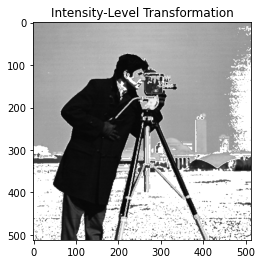

In [194]:
img=data.camera()
h,w=img.shape
for i in range(0,h):
    for j in range(0,w):
        if img[i][j]>=100 and img[i][j]<150:
            img[i][j]=255
plt.title("Intensity-Level Transformation")
plt.imshow(img, 'gray')

Bit-Planes of 8-bit Image -> (0-2<sup>1</sup>), (2<sup>1</sup>-2<sup>2</sup>), (2<sup>2</sup>-2<sup>3</sup>), (2<sup>3</sup>-2<sup>4</sup>), (2<sup>4</sup>-2<sup>5</sup>), (2<sup>5</sup>-2<sup>6</sup>), (2<sup>6</sup>-2<sup>7</sup>), (2<sup>7</sup>-2<sup>8</sup>)

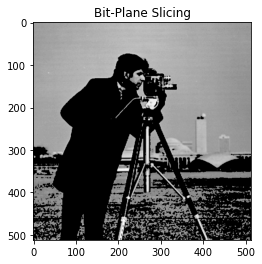

In [195]:
img=data.camera()
h,w=img.shape
for i in range(0,h):
    for j in range(0,w):
        if img[i][j]>=128 and img[i][j]<255:
            pass
        else:
            img[i][j]=0
plt.title('Bit-Plane Slicing')
plt.imshow(img, 'gray')

Hello World
